<a href="https://colab.research.google.com/github/AudeAymone/PassengersNumberPrediction/blob/AudeBranch/Refonte_Projet_Team4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des librairies

San sebastien (Donostia)

In [50]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [51]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load and inspect data

In [118]:
# Charger les données
df = pd.read_csv("data_passagers.csv")

In [53]:
print(df.shape)

(37621, 5)


Ce jeu de données contient 37621 lignes et 5 colonnes.

In [54]:
# Afficher la description générale des données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          37621 non-null  object
 1   weather           37621 non-null  int64 
 2   lineNumber        37621 non-null  int64 
 3   passengersNumber  37621 non-null  int64 
 4   lineType          37621 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB
None


Nous avons au total 37621 lignes de données.
Les attributs de ce jeu de données sont:


*   dateTime
*   weather
*   lineNumber
*   passengersNumber
*   lineType



In [55]:
# Afficher les 5 premières lignes des données
display(df.head())

,dateTime,weather,lineNumber,passengersNumber,lineType
0,2019-04-05,26,29,3032,daily
1,2019-04-05,26,42,418,daily
2,2019-04-05,26,40,2065,daily
3,2019-04-05,26,104,115,night
4,2019-04-05,26,27,2900,daily


In [56]:
# Afficher les statistiques descriptives des données
display(df.describe())

,weather,lineNumber,passengersNumber
count,37621.000000,37621.000000,37621.000000
mean,24.010579,31.744903,2067.940990
std,11.734847,23.335248,2494.733418
min,11.000000,5.000000,1.000000
25%,13.000000,17.000000,365.000000
50%,24.000000,28.000000,1241.000000
75%,26.000000,38.000000,2558.000000
max,62.000000,110.000000,16124.000000


In [57]:
print(df['lineNumber'].nunique())

39


Il y a **39 lignes de bus**.

# Y'a-t-il des valeurs manquantes ?

In [58]:
import matplotlib.pyplot as plt

Nombre de valeurs manquantes par colonne :

dateTime            0
weather             0
lineNumber          0
passengersNumber    0
lineType            0
dtype: int64

Pourcentage de valeurs manquantes par colonne :

dateTime            0.0
weather             0.0
lineNumber          0.0
passengersNumber    0.0
lineType            0.0
dtype: float64


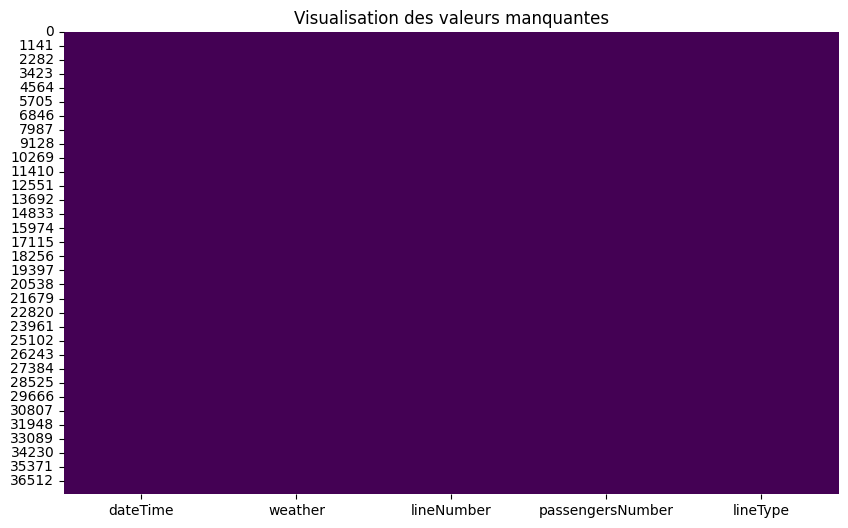

In [59]:
import pandas as pd

# Aperçu du nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

print("Nombre de valeurs manquantes par colonne :\n")
print(missing_values)

# Pourcentage de valeurs manquantes par colonne
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("\nPourcentage de valeurs manquantes par colonne :\n")
print(missing_percentage)

# Visualisation rapide avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

Il n'y a aucune valeur manquante dans ce dataset.

# Data Visualisation

## Saisonnalité en fonction des périodes

### Visualisation de la saisonnalité globale

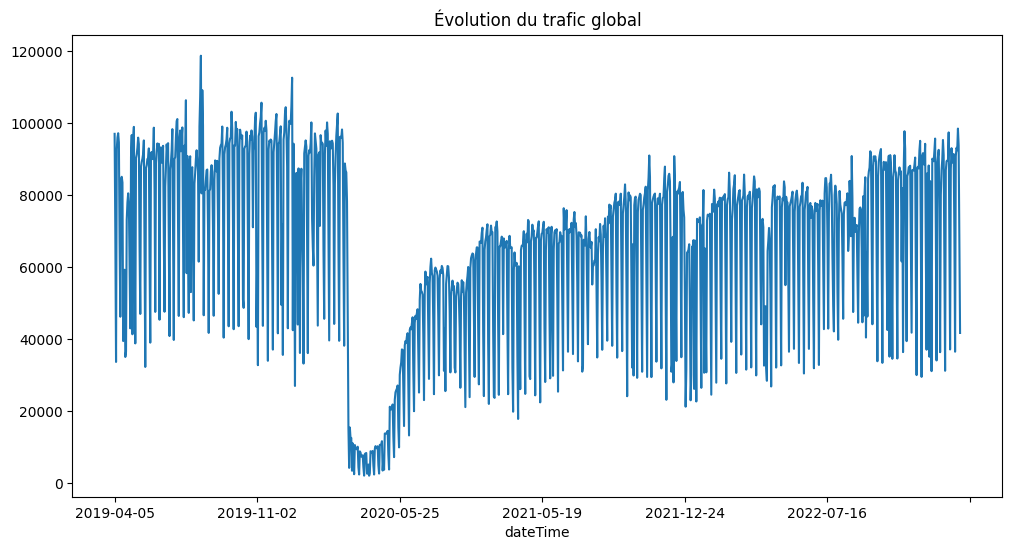

In [60]:
# Visualisation de la saisonnalité globale
df.groupby('dateTime')['passengersNumber'].sum().plot(figsize=(12,6))
plt.title("Évolution du trafic global")
plt.show()

On constate des gap.

La cause est probablement un manque de dates dans le dataset.

Le pic descendant quant à lui correspond à la période de covid.

### Exploration des dates manquantes

In [68]:
# Création de la plage de dates complète (du début à la fin de ton dataset)
full_range = pd.date_range(start=df['dateTime'].min(), end=df['dateTime'].max(), freq='D')

# Identification les dates qui ne sont pas dans ton DataFrame
# Transformation les dates du DF en set pour une comparaison rapide
existing_dates = pd.to_datetime(df['dateTime']).dt.normalize().unique()
missing_dates = full_range[~full_range.isin(existing_dates)]

print(f"Nombre de jours totalement absents du dataset : {len(missing_dates)}")
print("Exemples de dates manquantes :")
print(missing_dates[:10])

Nombre de jours totalement absents du dataset : 258
Exemples de dates manquantes :
DatetimeIndex(['2019-04-09', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-07-05'], dtype='datetime64[ns]', freq=None)


In [69]:
missing_df = pd.DataFrame(missing_dates, columns=['date'])
missing_df['year_month'] = missing_df['date'].dt.to_period('M')

# Nombre de jours manquent par mois
missing_counts = missing_df.groupby('year_month').size()
print("Nombre de jours manquants par mois :")
print(missing_counts[missing_counts > 0])

Nombre de jours manquants par mois :
year_month
2019-04     1
2019-06     8
2019-07     1
2019-10     1
2020-01     3
2020-02     2
2020-07     5
2020-09     2
2020-10     1
2020-11    14
2020-12    31
2021-01    31
2021-02    28
2021-03    31
2021-04    16
2021-06    17
2021-08     1
2021-10     1
2022-05     3
2022-07     1
2022-09     1
2022-10     1
2022-12    12
2023-01    31
2023-02    15
Freq: M, dtype: int64


### Saisonnalité par année

In [119]:
# Transformation de la date à bonne structuration
df['dateTime'] = pd.to_datetime(df['dateTime'], format='%Y-%m-%d')
df['day_of_week'] = df['dateTime'].dt.day_name()
df['month'] = df['dateTime'].dt.month
df['year'] = df['dateTime'].dt.year

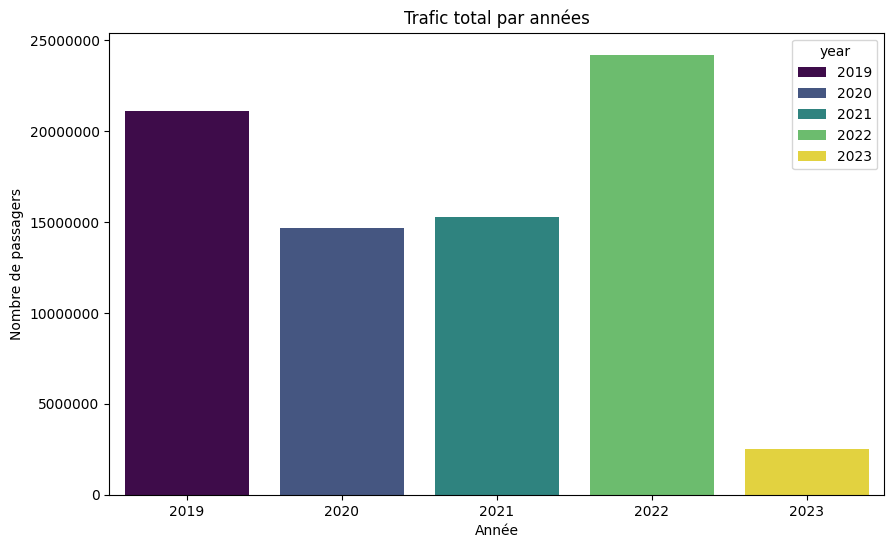

In [73]:
df_year_traffic = df.groupby('year')['passengersNumber'].sum()

# Ordonner les années dans l'ordre croissant
df_year_traffic = df_year_traffic.sort_index()


# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_year_traffic.index, y=df_year_traffic.values, palette='viridis', hue= df_year_traffic.index)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par années")
plt.xlabel("Année")
plt.ylabel("Nombre de passagers")
plt.show()

* On remarque une **baisse de fréquentation** pour les années **2020** et **2021**. Cela est sûrement dû au covid et aux données manquantes. Il faudrait une analyse plus approfondie de ces données.
* Le taux de fréquentation pour l'année **2023** est le plus faible car les données pour cette année ne vont qu'au mois de **Mars** et certaines dates sont manquantes.

### Saisonnalité par mois

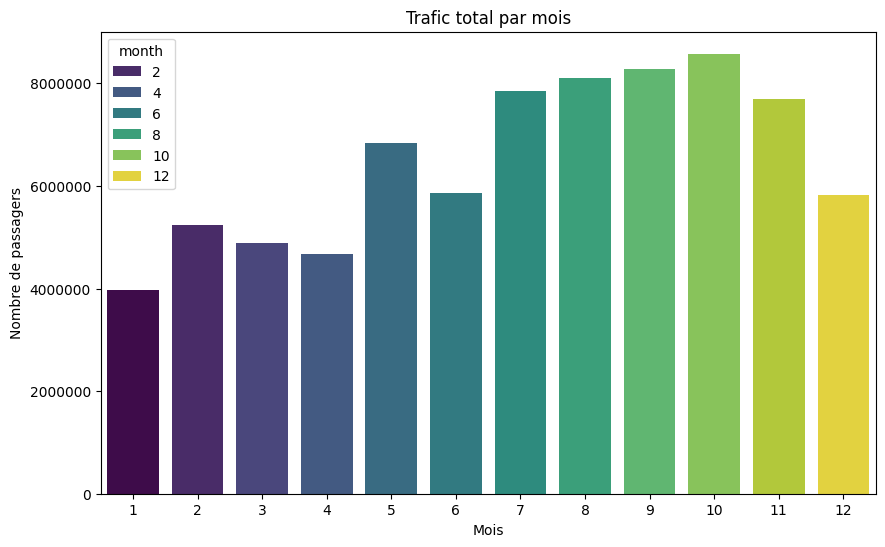

In [74]:
df_month_traffic = df.groupby('month')['passengersNumber'].sum()

# Ordonner les années dans l'ordre croissant
df_month_traffic = df_month_traffic.sort_index()
df_month = df['month'].nunique()
# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_month_traffic.index, y=df_month_traffic.values, palette='viridis', hue= df_month_traffic.index)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de passagers")
plt.show()

* On remarque une  une **forte affluence** pour la période de **Juillet** à **Novembre**.

### Saisonnalité par semaine

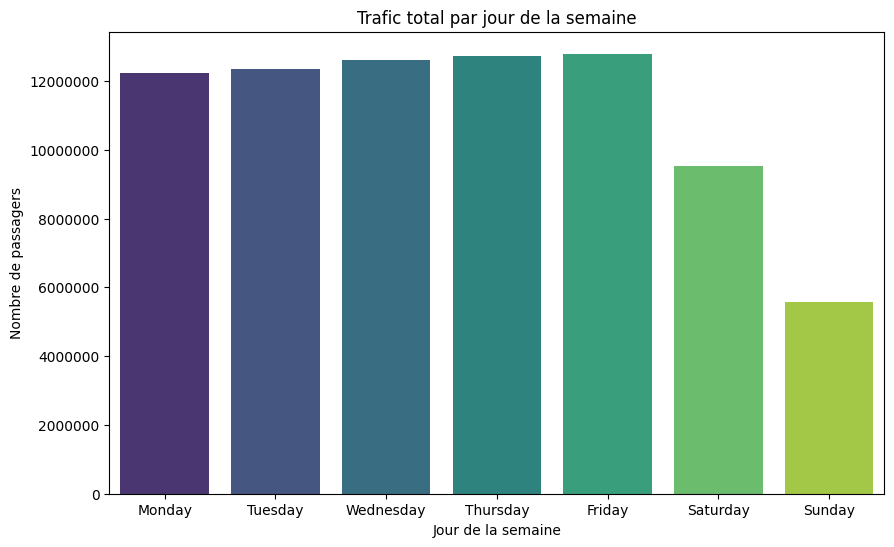

In [75]:
df_daily_traffic = df.groupby('day_of_week')['passengersNumber'].sum()

# Ordonner les jours de la semaine pour une meilleure visualisation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_daily_traffic = df_daily_traffic.reindex(day_order)

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_daily_traffic.index, y=df_daily_traffic.values, palette='viridis',hue= day_order)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de passagers")
plt.show()

* Nous remarquons une certaine **saisonnalité** avec **une baisse de fréquentation** durant **les weekends**.

## Distribution des passagers par type de ligne

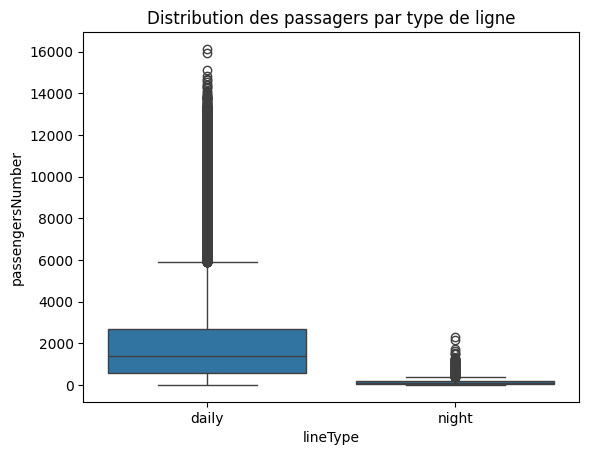

In [76]:
# Visualisation de la distribution des passagers par type de ligne (Dayline vs Nightline)
sns.boxplot(x='lineType', y='passengersNumber', data=df)
plt.title("Distribution des passagers par type de ligne")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Les lignes de bus de **jour** sont beaucoup plus fréquentées que celles de **nuit**.

## Distribution des lignes par type

### Distribution des lignes par type

/tmp/ipython-input-3379430066.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=line_distribution, x='lineType', y='nb_lignes', palette='viridis')


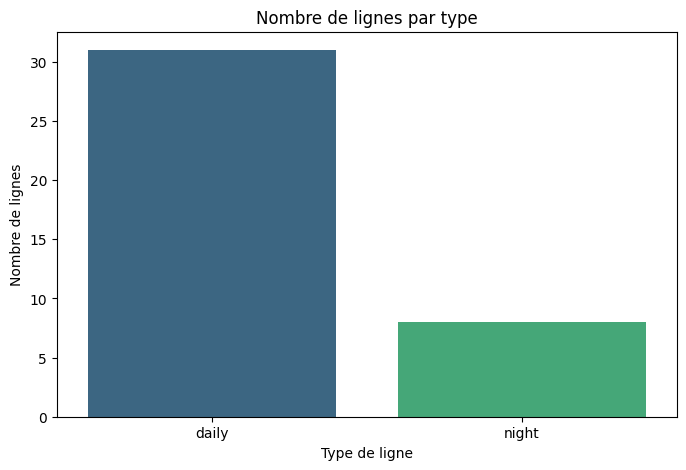

In [77]:
# Groupby lineType et compter le nombre de lignes
line_distribution = df.groupby('lineType')['lineNumber'].nunique().reset_index()

# Renommer les colonnes pour plus de clarté
line_distribution.columns = ['lineType', 'nb_lignes']

# Visualisation de la distribution des lignes par type
plt.figure(figsize=(8,5))
sns.barplot(data=line_distribution, x='lineType', y='nb_lignes', palette='viridis')

plt.title("Nombre de lignes par type")
plt.xlabel("Type de ligne")
plt.ylabel("Nombre de lignes")
plt.show()

Il y a au 31 lignes de jour et 8 de nuit.

### Trafic pour les lignes de jour

/tmp/ipython-input-736284322.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_shift, x='lineNumber', y='passengersNumber', palette='magma')


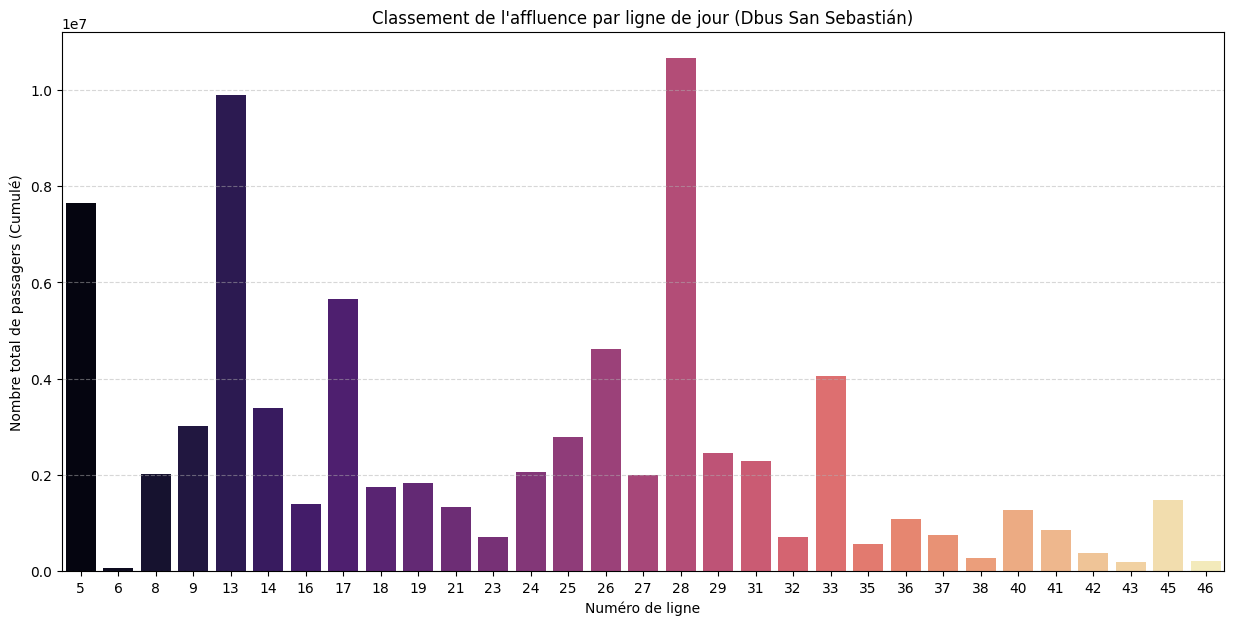

In [78]:
# Filtrer uniquement les lignes de nuit
df_day = df[df['lineType'] == 'daily']

# 2. Grouper par ligne pour obtenir l'affluence totale
# On utilise la somme pour voir quelles lignes transportent le plus de monde
daily_shift = df_day.groupby('lineNumber')['passengersNumber'].sum().reset_index()

# 4. Visualisation
plt.figure(figsize=(15, 7)) # On élargit car il y a beaucoup de lignes
sns.barplot(data=daily_shift, x='lineNumber', y='passengersNumber', palette='magma')

plt.title("Classement de l'affluence par ligne de jour (Dbus San Sebastián)")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers (Cumulé)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Les lignes 28 et 13 sont les plus fréquentées. La 6 est la moins fréquentée.

### Trafic pour les lignes de nuit

/tmp/ipython-input-2425584046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=night_shift, x='lineNumber', y='passengersNumber', palette='viridis')


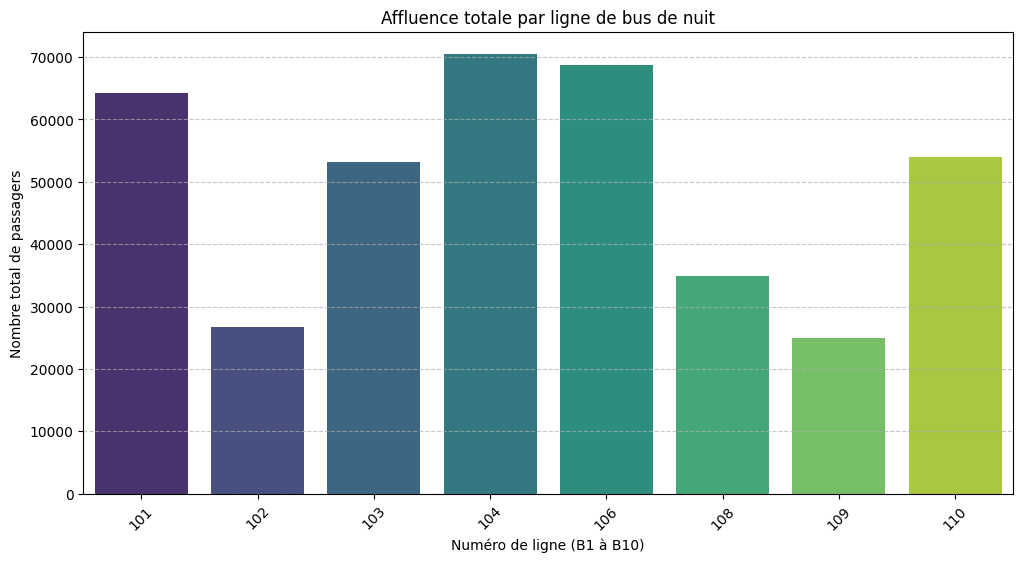

In [79]:
# Filtrer uniquement les lignes de nuit
df_night = df[df['lineType'] == 'night']

night_shift = df_night.groupby('lineNumber')['passengersNumber'].sum().reset_index()

# 3. Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=night_shift, x='lineNumber', y='passengersNumber', palette='viridis')

plt.title("Affluence totale par ligne de bus de nuit")
plt.xlabel("Numéro de ligne (B1 à B10)")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La ligne 104 est la plus fréquentée des lignes de nuit et la 109, la moins fréquentée.

## Trafic par numéro de ligne

/tmp/ipython-input-864624363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lines.index, y=lines.values, palette="viridis")


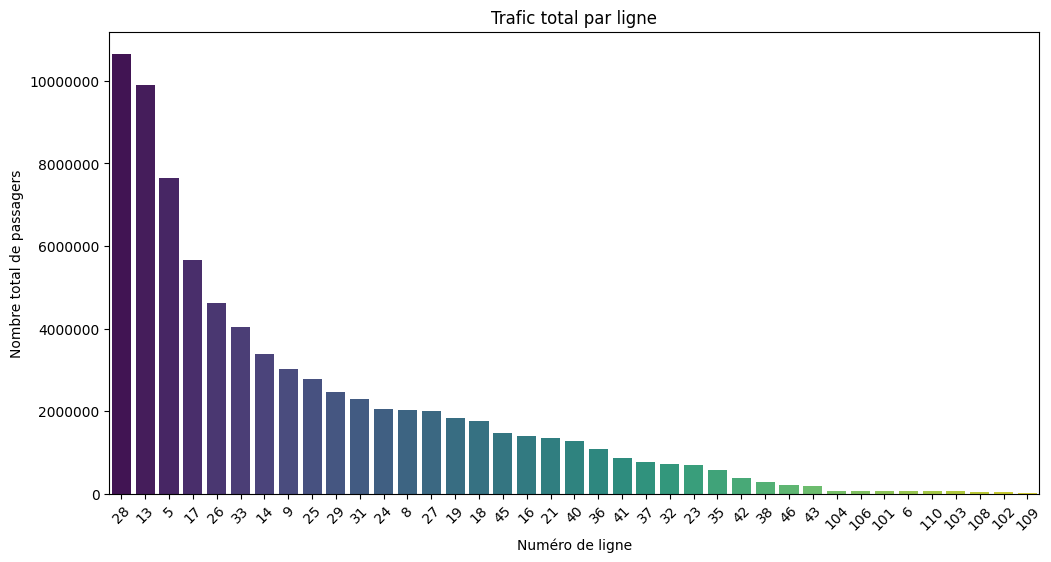

In [82]:
df_line_traffic = df.groupby('lineNumber')['passengersNumber'].sum()

# Tri décroissant et sélection du top 20
lines = df_line_traffic.sort_values(ascending=False)

# Conversion en string pour éviter l'ordre numérique
lines.index = lines.index.astype(str)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=lines.index, y=lines.values, palette="viridis")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par ligne")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.show()


Les lignes sont la plus fréquentée est la 28 et la moins fréquentée, la 109.

## Top 20 des lignes les plus fréquentés

In [ ]:
df_line_traffic = df.groupby('lineNumber')['passengersNumber'].sum()

# Tri décroissant et sélection du top 20
top20_lines = df_line_traffic.sort_values(ascending=False).head(20)

# Conversion en string pour éviter l'ordre numérique
top20_lines.index = top20_lines.index.astype(str)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=top20_lines.index, y=top20_lines.values, palette="viridis")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Top 20 des lignes avec le plus de passagers")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.show()


## Corrélation des variables

#### Visualisation de toutes les variables

In [83]:
import seaborn as sns
import pandas as pd

In [84]:
print(df.head())

    dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year
0 2019-04-05       26          29              3032    daily      Friday      4  2019
1 2019-04-05       26          42               418    daily      Friday      4  2019
2 2019-04-05       26          40              2065    daily      Friday      4  2019
3 2019-04-05       26         104               115    night      Friday      4  2019
4 2019-04-05       26          27              2900    daily      Friday      4  2019


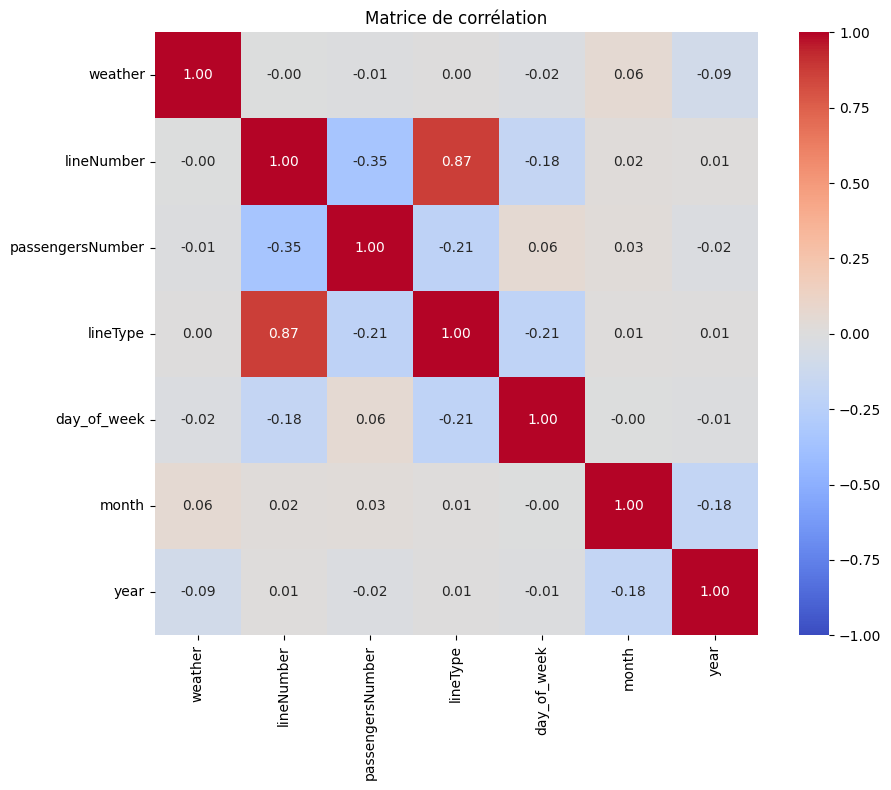

In [85]:
# Matrice de corrélation par rapport à la target passengersNumber

# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['date', 'dateTime', 'year_month']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Encoder les variables catégorielles en codes numériques pour la corrélation
for col in ['lineType', 'day_of_week']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()


# Afficher la heatmap des corrélations (incluant la target)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

* **lineNumber** Corrélation négative modérée : certaines lignes de bus ont moins de passagers que d’autres. Le numéro de ligne est donc un facteur discriminant.
* **lineType** Corrélation négative faible à modérée : le type de ligne (ex. urbaine vs interurbaine) influence le nombre de passagers.

- Les variables lineNumber et lineType sont les plus explicatives (elles différencient les lignes en termes d’affluence).
- Les variables temporelles simples (day_of_week, month, year) n’expliquent pas beaucoup à elles seules.
- La météo telle que codée actuellement n’apporte pas d’information (il faudrait peut-être la transformer en catégories plus pertinentes).


**Il n'y a pas de corrélation linéaire forte en les features actuelles et la variable cible**

## Feature engineering

### Encodage de day_of_week, is_weekend

In [120]:
df['day_of_week_num'] = df['dateTime'].dt.dayofweek
df['is_weekend'] = df['day_of_week_num'].isin([5,6]).astype(int)

In [121]:
print(df.sample(10))

        dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year  day_of_week_num  is_weekend
20928 2021-08-25       13          25              2288    daily   Wednesday      8  2021                2           0
3255  2019-07-22       12          29              3112    daily      Monday      7  2019                0           0
12526 2020-06-01       23          37               237    daily      Monday      6  2020                0           0
10053 2020-02-18       23          42               422    daily     Tuesday      2  2020                1           0
6941  2019-11-11       25          14              4153    daily      Monday     11  2019                0           0
20097 2021-07-29       43          19              1679    daily    Thursday      7  2021                3           0
1985  2019-06-04       23          26              4922    daily     Tuesday      6  2019                1           0
24540 2021-12-14       12          18           

### Encodage de lineType

In [122]:
df['lineType'] = df['lineType'].astype('category').cat.codes # 0 pour Dayline, 1 pour Nightline

In [123]:
print(df.sample(10))

        dateTime  weather  lineNumber  passengersNumber  lineType day_of_week  month  year  day_of_week_num  is_weekend
17295 2020-11-13       12          27              1706         0      Friday     11  2020                4           0
34470 2022-10-16       12           5              3039         0      Sunday     10  2022                6           1
3794  2019-08-07       43          45              1396         0   Wednesday      8  2019                2           0
23748 2021-11-20       12          36               698         0    Saturday     11  2021                5           1
33233 2022-09-08       43         110                71         1    Thursday      9  2022                3           0
37211 2023-03-07       25          26              5435         0     Tuesday      3  2023                1           0
10198 2020-02-22       12           6                31         0    Saturday      2  2020                5           1
19100 2021-06-28       25          21   

### Encodage de lineNumber

In [147]:
df['lineNumber'] = df['lineNumber'].astype('category')

### Encodage des variables catégorielles (weather, lineType)


#### Encodage de weather

In [160]:
weather_mapping = {
    # Famille 1
    25: 1, 53: 1, 54: 1, 52: 1, 61: 1, 62: 1,
    # Famille 2
    12: 2, 24: 2, 26: 2, 45: 2, 46: 2, 51: 2,
    # Famille 3
    13: 3, 14: 3, 15: 3, 16: 3, 23: 3, 35:3, 43: 3,
    # Famille 4
    17: 4, 44: 4,
    # Famille 5
    11: 5
}

# Application du mapping
df['weather_family'] = df['weather'].map(weather_mapping)

# Vérification
display(df[['weather','weather_family']].head())


,weather,weather_family
37,26,2
71,25,1
77,25,1
114,26,2
146,25,1


In [161]:
# 1. Application du mapping
df['weather_family'] = df['weather'].map(weather_mapping)

# 2. Remplir les éventuels NaN (Optionnel mais recommandé)
# Ici on met 0 pour les codes météo non répertoriés
df['weather_family'] = df['weather_family'].fillna(0)
# 3. Conversion forcée en entier
df['weather_family'] = df['weather_family'].astype(int)

# 4. Vérification du type et des valeurs
print(df['weather_family'].dtype)
display(df[['weather','weather_family' ]].drop_duplicates().sample(10))

int64


,weather,weather_family
243,12,2
400,17,4
71,25,1
2658,61,1
2801,53,1
3212,46,2
37,26,2
886,24,2
230,23,3
3720,44,4


In [162]:
# @title
# 1. Filtrer les lignes où la famille est 0
df_missing_weather = df[df['weather_family'] == 0]

# 2. Afficher les couples uniques (weather -> 0)
# Cela permet de voir quels codes 'weather' n'ont pas été mappés
missing_codes = df_missing_weather[['weather', 'weather_family']].drop_duplicates()

print(f"Il y a {len(missing_codes)} code(s) météo sans famille correspondante :")
display(missing_codes)

Il y a 0 code(s) météo sans famille correspondante :


,weather,weather_family


#### One-hot Encoding de la variable weather

In [163]:
# Vérification
# Conversion de toutes les colonnes booléennes en 0/1
df = pd.get_dummies(df, columns=['weather_family'], prefix='weather_family')
display(df.sample(10))

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,is_holiday,is_tamborrada,passengersNumber_of_yesterday,passengersNumber_of_two_days_ago,passengersNumber_of_three_days_ago,passengers_J_minus_7,passengers_J_minus_14,moyenne_traffic_sur_7j,moyenne_traffic_sur_30j,ecart_type_traffic_sur_7j,ecart_type_traffic_sur_30j,weather_family_1,weather_family_2,weather_family_3,weather_family_4,weather_family_5
23236,2021-11-04,25,41,1250,0,Thursday,11,2021,3,0,0,0,1311.0,1129.0,290.0,1041.0,1024.0,939.857143,829.066667,359.357032,321.586791,True,False,False,False,False
16807,2020-10-28,45,32,617,0,Wednesday,10,2020,2,0,0,0,659.0,609.0,477.0,665.0,621.0,631.714286,539.733333,72.327298,194.611360,False,True,False,False,False
3836,2019-08-08,11,29,3173,0,Thursday,8,2019,3,0,0,0,3151.0,2998.0,2733.0,2935.0,2408.0,2737.142857,2821.366667,504.968457,524.489932,False,False,False,False,True
14873,2020-08-27,43,8,1587,0,Thursday,8,2020,3,0,0,0,1577.0,1647.0,1471.0,1608.0,1442.0,1412.000000,1451.866667,281.222332,275.426032,False,False,True,False,False
36943,2023-02-27,35,17,8003,0,Monday,2,2023,0,0,0,0,2211.0,3216.0,7363.0,7290.0,3405.0,6346.857143,5571.000000,2537.956096,2404.990903,False,False,True,False,False
28482,2022-04-13,15,104,10,1,Wednesday,4,2022,2,0,0,0,337.0,57.0,340.0,249.0,52.0,198.714286,136.466667,125.696346,128.495467,False,False,True,False,False
33236,2022-09-09,25,36,480,0,Friday,9,2022,4,0,0,0,1252.0,1197.0,502.0,1135.0,1105.0,929.142857,1013.333333,338.083534,253.187178,True,False,False,False,False
19970,2021-07-25,23,27,586,0,Sunday,7,2021,6,1,0,0,1163.0,1770.0,1789.0,593.0,649.0,1508.142857,1522.200000,462.250087,482.011260,False,False,True,False,False
15698,2020-09-24,24,37,670,0,Thursday,9,2020,3,0,0,0,647.0,600.0,639.0,648.0,662.0,544.428571,492.366667,175.657676,166.356593,False,True,False,False,False
2374,2019-06-24,13,21,1446,0,Monday,6,2019,0,0,0,0,811.0,1724.0,1581.0,1437.0,881.0,1493.142857,1461.800000,317.048592,342.732971,False,False,True,False,False


### Ajout d'une variable is_holiday

In [130]:
import holidays as hd

In [131]:
es_holidays = hd.Spain(subdiv="PV", years=range(2019,2024))

df["is_holiday"] = df['dateTime'].isin(es_holidays).astype(int)

display(df[['is_holiday','dateTime']])

/tmp/ipython-input-915818206.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df["is_holiday"] = df['dateTime'].isin(es_holidays).astype(int)


,is_holiday,dateTime
0,0,2019-04-05
1,0,2019-04-05
2,0,2019-04-05
3,0,2019-04-05
4,0,2019-04-05
...,...,...
37616,0,2023-03-19
37617,0,2023-03-19
37618,0,2023-03-19
37619,0,2023-03-19


### Ajout d'une variable is_tambora

In [132]:
# Ajout de la San Sebastián Day
custom_dates = ['2023-01-20', '2022-01-20','2021-01-20','2020-01-20','2019-01-20']
df['is_tamborrada'] = df['dateTime'].dt.strftime('%Y-%m-%d').isin(custom_dates).astype(int)

display(df[['is_tamborrada','dateTime']])

,is_tamborrada,dateTime
0,0,2019-04-05
1,0,2019-04-05
2,0,2019-04-05
3,0,2019-04-05
4,0,2019-04-05
...,...,...
37616,0,2023-03-19
37617,0,2023-03-19
37618,0,2023-03-19
37619,0,2023-03-19


In [133]:
total_tamborrada = df[df['is_tamborrada'] == 1].groupby('dateTime')['passengersNumber'].sum().reset_index()

print("Trafic total cumulé (toutes lignes) pour la Tamborrada :")
display(total_tamborrada)

Trafic total cumulé (toutes lignes) pour la Tamborrada :


,dateTime,passengersNumber
0,2020-01-20,60445
1,2022-01-20,30644


### Lag features (Captation des dépendances aux jours précédents)

#### Captation sur 3 jours d'affilé

In [134]:
df = df.sort_values(by=['lineNumber','dateTime'])
df['passengersNumber_of_yesterday'] = df.groupby('lineNumber')['passengersNumber'].shift(1)
df['passengersNumber_of_two_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(2)
df['passengersNumber_of_three_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(3)

#### Captation sur 7 jours et 14 jours

In [136]:
# Trafic à la même heure/jour la semaine dernière
df['passengers_J_minus_7'] = df.groupby('lineNumber')['passengersNumber'].shift(7)
# Trafic il y a 2 semaines (optionnel mais utile)
df['passengers_J_minus_14'] = df.groupby('lineNumber')['passengersNumber'].shift(14)

#### Captation sur 7j (Moyenne et écart-type)

In [137]:
# Moyenne mobile sur 7 jours (rolling mean)
df['moyenne_traffic_sur_7j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)  # décalage pour ne pas inclure le jour courant
      .rolling(window=7)
      .mean()
)

# Moyenne mobile sur 7 jours (rolling mean)
df['moyenne_traffic_sur_30j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)  # décalage pour ne pas inclure le jour courant
      .rolling(window=30)
      .mean()
)

# Écart-type mobile sur 7 jours (rolling std)
df['ecart_type_traffic_sur_7j'] = (
      df.groupby('lineNumber')['passengersNumber']
        .shift(1)
        .rolling(window=7)
        .std()
  )

# Écart-type mobile sur 30 jours (rolling std)
df['ecart_type_traffic_sur_30j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)
      .rolling(window=30)
      .std()
)


In [138]:
display(df.head(10))

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,weather_family_1,weather_family_2,weather_family_3,weather_family_4,weather_family_5,is_holiday,is_tamborrada,passengersNumber_of_yesterday,passengersNumber_of_two_days_ago,passengersNumber_of_three_days_ago,passengers_J_minus_7,passengers_J_minus_14,moyenne_traffic_sur_7j,moyenne_traffic_sur_30j,ecart_type_traffic_sur_7j,ecart_type_traffic_sur_30j
37,2019-04-05,26,5,10426,0,Friday,4,2019,4,0,False,True,False,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2019-04-06,25,5,7330,0,Saturday,4,2019,5,1,True,False,False,False,False,0,0,10426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2019-04-07,25,5,3179,0,Sunday,4,2019,6,1,True,False,False,False,False,0,0,7330.0,10426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2019-04-08,26,5,9618,0,Monday,4,2019,0,0,False,True,False,False,False,0,0,3179.0,7330.0,10426.0,NaN,NaN,NaN,NaN,NaN,NaN
146,2019-04-10,25,5,9974,0,Wednesday,4,2019,2,0,True,False,False,False,False,0,0,9618.0,3179.0,7330.0,NaN,NaN,NaN,NaN,NaN,NaN
178,2019-04-11,26,5,9887,0,Thursday,4,2019,3,0,False,True,False,False,False,0,0,9974.0,9618.0,3179.0,NaN,NaN,NaN,NaN,NaN,NaN
230,2019-04-12,23,5,9530,0,Friday,4,2019,4,0,False,False,True,False,False,0,0,9887.0,9974.0,9618.0,NaN,NaN,NaN,NaN,NaN,NaN
243,2019-04-13,12,5,7275,0,Saturday,4,2019,5,1,False,True,False,False,False,0,0,9530.0,9887.0,9974.0,10426.0,NaN,8563.428571,NaN,2574.571929,NaN
289,2019-04-14,15,5,5395,0,Sunday,4,2019,6,1,False,False,True,False,False,0,0,7275.0,9530.0,9887.0,7330.0,NaN,8113.285714,NaN,2467.893820,NaN
319,2019-04-15,25,5,9050,0,Monday,4,2019,0,0,True,False,False,False,False,0,0,5395.0,7275.0,9530.0,3179.0,NaN,7836.857143,NaN,2670.319920,NaN


#### Visualisation du nombre de passager par famille de météo

## Mesure de corrélation avec la variable cible (avec les nouvelles features)

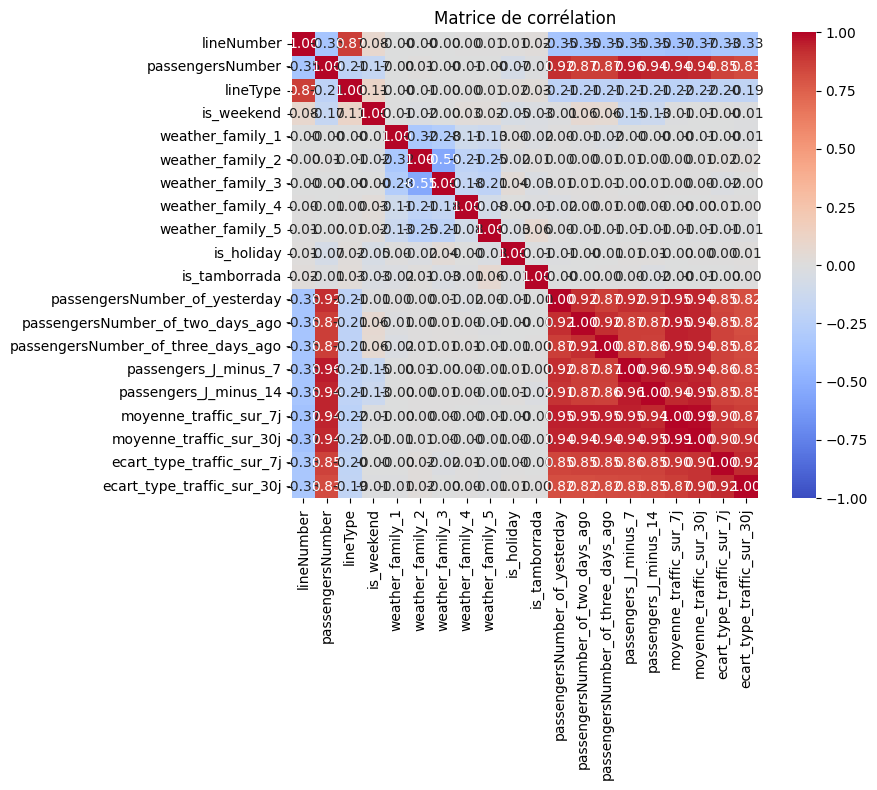

In [142]:
# @title
# Matrice de corrélation par rapport à la target passengersNumber

# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['dateTime', 'month','day_of_week','day_of_week_num','year','weather']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()


# Afficher la heatmap des corrélations (incluant la target)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

In [148]:
display(df.sample(10))

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,weather_family_1,weather_family_2,weather_family_3,weather_family_4,weather_family_5,is_holiday,is_tamborrada,passengersNumber_of_yesterday,passengersNumber_of_two_days_ago,passengersNumber_of_three_days_ago,passengers_J_minus_7,passengers_J_minus_14,moyenne_traffic_sur_7j,moyenne_traffic_sur_30j,ecart_type_traffic_sur_7j,ecart_type_traffic_sur_30j
29862,2022-05-28,13,36,656,0,Saturday,5,2022,5,1,False,False,True,False,False,0,0,1113.0,1145.0,1148.0,728.0,1052.0,950.857143,973.833333,302.067558,250.998569
3594,2019-08-01,23,27,2227,0,Thursday,8,2019,3,0,False,False,True,False,False,0,0,851.0,2212.0,2089.0,917.0,2347.0,1457.142857,1908.733333,676.243405,695.636693
35950,2022-12-01,46,36,1376,0,Thursday,12,2022,3,0,False,True,False,False,False,0,0,1335.0,1295.0,1272.0,1402.0,1288.0,1133.285714,1082.833333,360.186856,340.207552
16563,2020-10-20,26,5,6314,0,Tuesday,10,2020,1,0,False,True,False,False,False,0,0,6116.0,2140.0,4556.0,7186.0,6998.0,5945.857143,5704.000000,1952.862722,1937.132630
25920,2022-01-25,11,40,1569,0,Tuesday,1,2022,1,0,False,False,False,False,True,0,0,1491.0,1176.0,1543.0,1523.0,1126.0,1476.571429,1363.333333,147.913102,317.137448
5397,2019-09-24,25,5,10408,0,Tuesday,9,2019,1,0,True,False,False,False,False,0,0,9803.0,4719.0,8502.0,9482.0,9968.0,8997.285714,8528.066667,1988.683795,1686.231361
28332,2022-04-09,25,6,44,0,Saturday,4,2022,5,1,True,False,False,False,False,0,0,67.0,53.0,48.0,51.0,24.0,43.714286,44.900000,16.316804,15.461521
1456,2019-05-19,54,5,3184,0,Sunday,5,2019,6,1,True,False,False,False,False,0,0,6780.0,9846.0,9167.0,5431.0,3642.0,8055.714286,7573.500000,1501.290080,2143.616759
4225,2019-08-19,24,24,1924,0,Monday,8,2019,0,0,False,True,False,False,False,0,0,762.0,1575.0,2138.0,1910.0,2108.0,1656.714286,1738.633333,601.625497,627.433661
7763,2019-12-06,13,33,1887,0,Friday,12,2019,4,0,False,False,True,False,False,1,0,5065.0,5164.0,5093.0,5696.0,4869.0,4413.857143,4443.333333,1427.978341,1399.537690


/tmp/ipython-input-784878187.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")


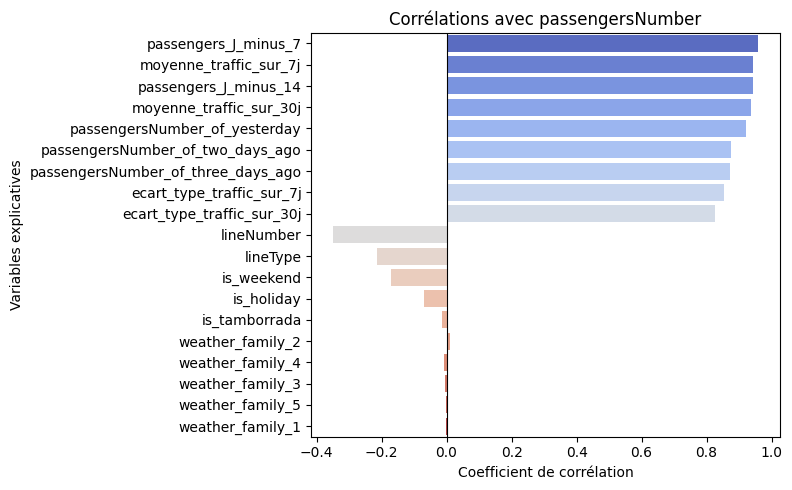

In [154]:
# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['dateTime', 'month','day_of_week','day_of_week_num','year','weather']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# Corrélations triées par rapport à la target
corr_with_target = corr_matrix['passengersNumber'].drop('passengersNumber').sort_values(
    key=lambda x: x.abs(), ascending=False
)

# Affichage en barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")
plt.title("Corrélations avec passengersNumber")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables explicatives")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

**Les features lag sont les plus corrélées à la variable cible.**

# Modelisation

### Baseline: XGBoost

#### Data preaparation

In [146]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [175]:
# 1. Liste des features validées par ton analyse de corrélation
features = [
    'lineNumber', 'lineType', 'is_weekend', 'is_holiday', 'is_tamborrada',
    'month', 'day_of_week',
    'weather_family_1', 'weather_family_2', 'weather_family_3', 'weather_family_4', 'weather_family_5',
    'passengers_J_minus_7', 'passengersNumber_of_yesterday',
    'moyenne_traffic_sur_7j', 'moyenne_traffic_sur_30j'
]

target = 'passengersNumber'

# 3. Split temporel (On entraîne sur 2022 et on teste sur 2023)
# On ignore la période instable avant 2022
train_df = df[(df['dateTime'] >= '2022-01-01') & (df['dateTime'] < '2023-01-01')]
test_df = df[df['dateTime'] >= '2023-01-01']

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

#### Entraîner un modèle XGBoost baseline

In [176]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np

model = xgb.XGBRegressor(
    tree_method="hist",        # Requis pour les catégories
    enable_categorical=True,    # Active la gestion native
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

[0]	validation_0-rmse:2655.74873
[100]	validation_0-rmse:407.11674
[200]	validation_0-rmse:395.94126
[300]	validation_0-rmse:397.33862
[400]	validation_0-rmse:397.58512
[500]	validation_0-rmse:398.66332
[600]	validation_0-rmse:396.84186
[700]	validation_0-rmse:397.78541
[800]	validation_0-rmse:399.48731
[900]	validation_0-rmse:400.44380
[999]	validation_0-rmse:400.80946


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

<Figure size 1000x800 with 0 Axes>

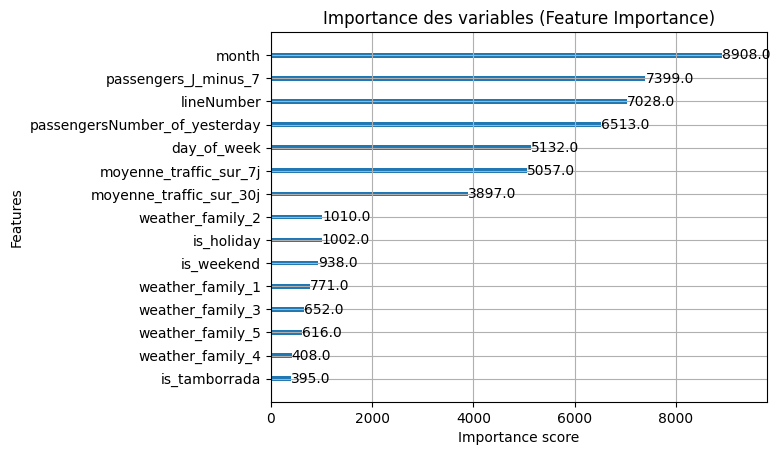

In [177]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=15)
plt.title("Importance des variables (Feature Importance)")
plt.show()

 ####  Évaluer les performances

In [178]:
# Évaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


Train -> MAE: 52.44, RMSE: 79.90, R²: 0.9989
Test  -> MAE: 198.93, RMSE: 400.81, R²: 0.9790


### Random Forest

#### Importer et préparer

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,      # nombre d’arbres
    max_depth=None,        # profondeur illimitée (peut tester 10-20 pour régulariser)
    min_samples_split=2,   # critère de split
    min_samples_leaf=1,    # taille minimale des feuilles
    random_state=42,
    n_jobs=-1              # utilise tous les cœurs CPU
)

rf_model.fit(X_train, y_train)


#### Évaluer

In [ ]:
# Prédictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")

#### Importance des features

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8,6), color="teal")
plt.title("Importance des variables (Random Forest)")
plt.show()

**Interprétation**

**Entraînement**
- MAE_train = 82.11 → le modèle se trompe en moyenne de ~82 passagers sur le train.
- RMSE_train = 188.69 → les grosses erreurs sont amplifiées, mais restent relativement contenues.
- R²_train = 0.9948 → le modèle explique presque toute la variance sur le train.
Le modèle apprend très bien les données historiques.
    
**Test**
- MAE_test = 102.97 → erreur moyenne de ~103 passagers, proche de ce que tu avais avec XGBoost.
- RMSE_test = 175.27 → les grosses erreurs existent toujours, mais restent dans la même gamme que XGBoost.
- R²_test = 0.8580 → ton modèle explique ~86 % de la variance sur des données jamais vues.
Random Forest généralise correctement, mais comme XGBoost, il reste sensible aux jours atypiques.

**Comparaison avec XGBoost**
- Les performances sont très proches :
- MAE_test ≈ 103 (XGBoost et RF)
- RMSE_test ≈ 173–175
- R²_test ≈ 0.86
Cela confirme que les features actuelles captent bien la tendance générale, mais qu’il manque des variables pour expliquer les jours extrêmes.

Ce que ça veut dire
- Ton modèle est robuste en moyenne (MAE bas, R² élevé).
- Les grosses erreurs (RMSE) viennent des jours atypiques : événements, vacances, météo extrême.
- Random Forest et XGBoost donnent des résultats similaires → **le problème n’est pas l’algorithme, mais les features disponibles**.


# Task
Analyze the Random Forest model's performance on the test set by visualizing the actual versus predicted passenger numbers and identifying instances where the model exhibits significant errors, particularly on "extreme days," to understand potential areas for feature engineering or model improvement.

## Verify for null values

### Subtask:
Add code to the selected cell to explicitly check for null values in the `passengersNumber` column and display any corresponding dates, confirming the initial data quality assessment.


## Summary:

### Data Analysis Key Findings
*   A data quality subtask has been initiated to explicitly verify for null values within the `passengersNumber` column.
*   The current focus is on adding code to identify and display any dates associated with potential null entries, aiming to confirm the initial data quality assessment.

### Insights or Next Steps
*   The immediate next step is to execute the planned code to assess the presence and context of any null values in the `passengersNumber` column.
*   Depending on the findings, further data cleaning or handling of missing values may be required before proceeding with the Random Forest model analysis.
